In [1]:
import sys
import os
import requests

# General packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import PIL.Image

from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tqdm.notebook import tqdm, trange

In [3]:
import glob
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [4]:
def find_gpus(nums=6):
    os.system('nvidia-smi -q -d Memory |grep -A4 GPU|grep Free >tmp_free_gpus')
    with open('tmp_free_gpus', 'r') as lines_txt:
        frees = lines_txt.readlines()
        idx_freeMemory_pair = [ (idx,int(x.split()[2]))
                              for idx,x in enumerate(frees) ]
    idx_freeMemory_pair.sort(key=lambda my_tuple:my_tuple[1],reverse=True)
    usingGPUs = [str(idx_memory_pair[0])
                    for idx_memory_pair in idx_freeMemory_pair[:nums] ]
    usingGPUs =  ','.join(usingGPUs)
    print('using GPU idx: #', usingGPUs)
    return usingGPUs

In [6]:
os.environ['CUDA_VISIBLE_DEVICES'] = find_gpus(nums=2)

using GPU idx: # 1,0


In [7]:
from random import randint

import numpy as np
import torch

In [ ]:
! git clone https://github.com/facebookresearch/InferSent.git

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/barzamini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/barzamini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/
! mkdir fastText
! curl -Lo fastText/crawl-300d-2M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
! unzip fastText/crawl-300d-2M.vec.zip -d fastText/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   315    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0   352    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2075M  100 2075M    0     0  5159k      0  0:06:51  0:06:51 --:--:-- 5142k13  278M    0     0  5467k      0  0:06:28  0:00:52  0:05:36 5128k  5242k      0  0:06:45  0:02:39  0:04:06 5452k9k4  0:02:06 5120k
Archive:  GloVe/glove.840B.300d.zip
  inflating: GloVe/glove.840B.300d.txt  
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1453M  100 1453M    0     0  33.6M      0  0:00:43  0:00:43 --:--:-- 36.4M
Archive:  fastText/crawl-300d-2M.vec.zip
  inflating: fastText/crawl-300d-2M.vec  


In [37]:
! mkdir encoder
! curl -Lo encoder/infersent1.pkl https://dl.fbaipublicfiles.com/infersent/infersent1.pkl
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  38.3M      0  0:00:03  0:00:03 --:--:-- 38.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146M  100  146M    0     0  40.5M      0  0:00:03  0:00:03 --:--:-- 40.5M


In [9]:
sys.path.append('./InferSent')

In [10]:
from models import InferSent
model_version = 1

In [11]:
MODEL_PATH = "encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [12]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
os.listdir('/raid/AISSEL/Hamed/datasets/wit/')

['wit_v1.train.all-00000-of-00010.tsv.gz',
 'wit_v1.train.all-00001-of-00010.tsv.gz',
 'wit_v1.train.all-00002-of-00010.tsv.gz',
 'wit_v1.train.all-00003-of-00010.tsv.gz',
 'wit_v1.train.all-00004-of-00010.tsv.gz',
 'wit_v1.train.all-00005-of-00010.tsv.gz',
 'wit_v1.train.all-00006-of-00010.tsv.gz',
 'wit_v1.train.all-00007-of-00010.tsv.gz',
 'wit_v1.train.all-00008-of-00010.tsv.gz',
 'wit_v1.train.all-00009-of-00010.tsv.gz',
 'wit_v1.train.all-1percent_sample.tsv']

In [17]:
root_path = '/raid/AISSEL/Hamed/datasets/wit'

In [ ]:
! gzip -d '/raid/AISSEL/Hamed/datasets/wit/wit_v1.train.all-1percent_sample.tsv.gz'

In [18]:
df = pd.read_csv(f'{root_path}/wit_v1.train.all-1percent_sample.tsv', sep='\t')
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
0,es,https://es.wikipedia.org/wiki/Hoz_y_martillo,https://upload.wikimedia.org/wikipedia/commons...,Hoz y martillo,Emblemas,Hoz y martillo / Galería / Emblemas,NaN,Galego: Logo do Movemento Galego ao Socialismo,NaN,image/jpeg,107,272,False,False,True,La hoz y el martillo es un símbolo que represe...,NaN
1,de,https://de.wikipedia.org/wiki/Kleines_Hasenmaul,https://upload.wikimedia.org/wikipedia/commons...,Kleines Hasenmaul,NaN,Kleines Hasenmaul,NaN,English: Lesser bulldog bat (Noctilio albivent...,NaN,image/jpeg,1636,2000,True,False,False,Das Kleine Hasenmaul ist eine Fledermausart au...,Das Kleine Hasenmaul (Noctilio albiventris) is...
2,ru,https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%...,https://upload.wikimedia.org/wikipedia/commons...,Украинская гривна,Изъятые из обращения монеты,Украинская гривна / Монеты / Изъятые из обраще...,NaN,English: Coin of Ukraine Русский: Юбилейная мо...,NaN,image/jpeg,193,200,False,True,True,"Гри́вна — национальная валюта Украины, названн...",С 1 июля 2018 года прекращён дополнительный вы...
3,ru,https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%...,http://upload.wikimedia.org/wikipedia/commons/...,Менделеево (Московская область),NaN,Менделеево (Московская область),NaN,English: mendeleevo,NaN,image/jpeg,1877,2756,True,True,False,Менделе́ево — посёлок городского типа Московск...,Менделе́ево — посёлок городского типа Московск...
4,sw,"https://sw.wikipedia.org/wiki/Brookline,_Massa...",https://upload.wikimedia.org/wikipedia/commons...,"Brookline, Massachusetts",NaN,"Brookline, Massachusetts","Sehemu za Mji wa Brookline, Massachusetts",English: Brookline MA August 2015 Photo Collage 2,NaN,image/jpeg,1936,1936,False,False,True,Brookline ni mji wa Marekani katika jimbo la M...,Brookline ni mji wa Marekani katika jimbo la M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370368,en,https://en.wikipedia.org/wiki/Suillus_quiescens,https://upload.wikimedia.org/wikipedia/commons...,Suillus quiescens,Habitat and distribution,Suillus quiescens / Habitat and distribution,S. quiescens forms mycorrhizal associations wi...,English: Pinus muricata at the Dundee Botanic ...,NaN,image/jpeg,2048,1536,False,True,False,Suillus quiescens is a pored mushroom of the g...,Fruit bodies grow together in small groups on ...
370369,fa,https://fa.wikipedia.org/wiki/%D8%A7%DA%A9%DB%...,https://upload.wikimedia.org/wikipedia/commons...,اکیر ترکی,NaN,اکیر ترکی,NaN,Species&#160; Acorus calamus Family&#160; Acor...,NaN,image/jpeg,1119,1650,True,False,False,اکیر ترکی نام یک سرده از گیاهان است.\nاین سرده...,اکیر ترکی (نام علمی: Acorus) نام یک سرده از گی...
370370,de,https://de.wikipedia.org/wiki/Fauler_See_(Schw...,http://upload.wikimedia.org/wikipedia/commons/...,Fauler See (Schwerin),NaN,Fauler See (Schwerin),NaN,"Lage der Seen in Schwerin, Position of the lak...",NaN,image/png,564,988,True,True,True,Der Faule See befindet sich in der mecklenburg...,Der Faule See befindet sich in der mecklenburg...
370371,ko,https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%...,https://upload.wikimedia.org/wikipedia/commons...,대한출판문화협회,NaN,대한출판문화협회,고영수 회장 (2015 서울국제도서전 개최 기념 기자간담회),한국어: 2015 서울국제도서전 개최 기념 기자간담회 (고영수 회장),NaN,image/jpeg,323,365,False,True,False,"대한출판문화협회는 출판산업의 건전한 발전도모, 출판문화의 사명달성으로 문화 향상에 ...","대한출판문화협회는 출판산업의 건전한 발전도모, 출판문화의 사명달성으로 문화 향상에 ..."


In [19]:
df = df[df["language"]=='en']

In [20]:
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,960,1280,False,False,True,Chinatown is an urban enclave situated in the ...,There are many bilingual street signs across C...
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,400,300,False,True,False,Jayson Scott Musson is an artist who lives and...,Jayson Scott Musson is an artist who lives and...
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,433,531,True,True,False,Euodynerus megaera is a species of stinging wa...,Euodynerus megaera is a species of stinging wa...
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,727,404,True,True,False,Simon Wolfe Rosendale was an American lawyer a...,"Simon Wolfe Rosendale (June 23, 1842 – April 2..."
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,1536,2048,False,True,False,The National Natural Landmarks in Florida incl...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370348,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,NaN,National Register of Historic Places listings ...,NaN,English: This modern hardware store is located...,Patterson Brothers Commercial Building and House,image/jpeg,1467,2200,False,True,False,This is a list of Registered Historic Places i...,This is a list of Registered Historic Places i...
370356,en,https://en.wikipedia.org/wiki/Varahi,http://upload.wikimedia.org/wikipedia/commons/...,Varahi,Temples,Varahi / Worship / Temples,Central icon of Varahi Chaurasi temple,English: ~ VARAHI above her Buffalo Vahana ~ c...,NaN,image/jpeg,800,443,False,True,True,"Varahi is one of the Matrikas, a group of seve...",Apart from the temples in which Varahi is wors...
370357,en,https://en.wikipedia.org/wiki/Six-stroke_engine,http://upload.wikimedia.org/wikipedia/commons/...,Six-stroke engine,Griffin six-stroke engine,Six-stroke engine / Engine types / Single-pist...,The Kerr engine at the Anson Engine Museum,"The Anson Engine Museum in Poynton, Cheshire c...",NaN,image/jpeg,3264,2448,False,True,True,The term six-stroke engine has been applied to...,"In 1883, the Bath-based engineer Samuel Griffi..."
370358,en,https://en.wikipedia.org/wiki/Yi_Sun-sin,https://upload.wikimedia.org/wikipedia/commons...,Yi Sun-sin,Turtle Ships,Yi Sun-sin / Military career / Japanese invasi...,Drawing of a 16th-century turtle ship,16th century Korean turtle ship in a depiction...,NaN,image/jpeg,1046,1521,False,True,True,Admiral Yi Sunsin was a Korean admiral and mil...,One of Yi's greatest accomplishments was resur...


In [21]:
df.describe()

,original_height,original_width
count,54071.000000,54071.000000
mean,1535.394814,1836.366481
std,1199.416882,1520.742352
min,100.000000,100.000000
25%,578.000000,640.000000
50%,1181.000000,1312.000000
75%,2304.000000,2667.000000
max,13922.000000,25088.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54071 entries, 5 to 370368
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   language                         54071 non-null  object
 1   page_url                         54071 non-null  object
 2   image_url                        54071 non-null  object
 3   page_title                       54071 non-null  object
 4   section_title                    30871 non-null  object
 5   hierarchical_section_title       54071 non-null  object
 6   caption_reference_description    32550 non-null  object
 7   caption_attribution_description  50802 non-null  object
 8   caption_alt_text_description     5626 non-null   object
 9   mime_type                        54071 non-null  object
 10  original_height                  54071 non-null  int64 
 11  original_width                   54071 non-null  int64 
 12  is_main_image                  

### Semantic Analysis on caption_reference_description + caption_attribution_description

Also you can consider context_page_description and context_section_description columns for analysis 

In [23]:
import re

In [24]:
def nospecial(text):
    text = re.sub("[^a-zA-Z0-9]+", "",text)
    return text

In [25]:
df['caption']=df['caption_reference_description'].fillna('') + ' ' + df['caption_attribution_description'].fillna('')
df['context']=df['context_page_description'].fillna('') + '\n' + df['context_section_description'].fillna('')
# df['caption'] = df['caption'].apply(nospecial)
df

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description,caption,context
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,960,1280,False,False,True,Chinatown is an urban enclave situated in the ...,There are many bilingual street signs across C...,English: Hay Street 中文（繁體）‎: 禧街,Chinatown is an urban enclave situated in the ...
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,400,300,False,True,False,Jayson Scott Musson is an artist who lives and...,Jayson Scott Musson is an artist who lives and...,"Jayson Musson on October 29, 2007 English: Jay...",Jayson Scott Musson is an artist who lives and...
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,433,531,True,True,False,Euodynerus megaera is a species of stinging wa...,Euodynerus megaera is a species of stinging wa...,English: Euodynerus megaera,Euodynerus megaera is a species of stinging wa...
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,727,404,True,True,False,Simon Wolfe Rosendale was an American lawyer a...,"Simon Wolfe Rosendale (June 23, 1842 – April 2...","English: Simon Wolfe Rosendale (June 23, 1842...",Simon Wolfe Rosendale was an American lawyer a...
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,1536,2048,False,True,False,The National Natural Landmarks in Florida incl...,NaN,English: Photograph of Rainbow Springs in Mar...,The National Natural Landmarks in Florida incl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370348,en,https://en.wikipedia.org/wiki/National_Registe...,https://upload.wikimedia.org/wikipedia/commons...,National Register of Historic Places listings ...,NaN,National Register of Historic Places listings ...,NaN,English: This modern hardware store is located...,Patterson Brothers Commercial Building and House,image/jpeg,1467,2200,False,True,False,This is a list of Registered Historic Places i...,This is a list of Registered Historic Places i...,English: This modern hardware store is locate...,This is a list of Registered Historic Places i...
370356,en,https://en.wikipedia.org/wiki/Varahi,http://upload.wikimedia.org/wikipedia/commons/...,Varahi,Temples,Varahi / Worship / Temples,Central icon of Varahi Chaurasi temple,English: ~ VARAHI above her Buffalo Vahana ~ c...,NaN,image/jpeg,800,443,False,True,True,"Varahi is one of the Matrikas, a group of seve...",Apart from the temples in which Varahi is wors...,Central icon of Varahi Chaurasi temple English...,"Varahi is one of the Matrikas, a group of seve..."
370357,en,https://en.wikipedia.org/wiki/Six-stroke_engine,http://upload.wikimedia.org/wikipedia/commons/...,Six-stroke engine,Griffin six-stroke engine,Six-stroke engine / Engine types / Single-pist...,The Kerr engine at the Anson Engine Museum,"The Anson Engine Museum in Poynton, Cheshire c...",NaN,image/jpeg,3264,2448

In [26]:
df.at[370368,'caption']

'S. quiescens forms mycorrhizal associations with Bishop Pine. English: Pinus muricata at the Dundee Botanic Garden'

In [27]:
df.at[370368,'context']

'Suillus quiescens is a pored mushroom of the genus Suillus in the family Suillaceae. First collected in 2002 on Santa Cruz Island off the coast of California, in association with Bishop Pine, the species was scientifically described and named in 2010. In addition to its distribution in coastal California, it was also found forming ectomycorrhizae with the roots of pine seedlings in the eastern Sierra Nevada, coastal Oregon, and the southern Cascade Mountains. It resembles Suillus brevipes, but can be distinguished from that species by its paler-colored immature cap and by the tiny colored glands on the stipe that darken with age.\nFruit bodies grow together in small groups on the ground in association with Bishop Pine (Pinus muricata). It is the most common Suillus species on Santa Cruz Island, its type locality and it has also been collected at Santa Rosa Island, and Point Reyes National Seashore in California. Santa Cruz and Santa Rosa, two of the four islands that make up the north

# Universal Sentence Encoder

In [28]:
# Keep it on CPU or put it on GPU
use_cuda = True
model = model.cuda() if use_cuda else model

In [29]:
# If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
W2V_PATH = 'GloVe/glove.840B.300d.txt' if model_version == 1 else 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [30]:
# Load embeddings of K most frequent words
model.build_vocab_k_words(K=1000000)

Vocab size : 1000000


## Load Pedestrian documents

In [31]:
file_names_wi_p = [f for f in glob.glob("data/wiki_texts/ped/*.txt")]
print(len(file_names_wi_p))

23626


In [32]:
file_names_br_p = [f for f in glob.glob("data/britanica_texts/ped/*.txt")]
print(len(file_names_br_p))

17888


In [33]:
file_names_wi_d = [f for f in glob.glob("data/wiki_texts/dup_words_file/*.txt")]
print(len(file_names_wi_d))

5578


In [34]:
file_names_br_d = [f for f in glob.glob("data/britanica_texts/dup_words_file/*.txt")]
print(len(file_names_br_d))

4871


In [35]:
docs_p = []
for fn in file_names_wi_p:
    c_txt = ""
    with open(fn, "r") as rf:
        c_txt = rf.read()
    docs_p.append(c_txt)

for fn in file_names_wi_d:
    c_txt = ""
    with open(fn, "r") as rf:
        c_txt = rf.read()
    docs_p.append(c_txt)

In [36]:
edit_line = "Our editors will review what you’ve submitted and determine whether to revise the article"

In [37]:
for fn in tqdm(file_names_br_d):
    c_txt = ""
    with open(fn, "r") as rf:
        r_text = rf.readlines()
        if r_text:
            if edit_line in r_text[0]:
                r_text = r_text[1:]

            for ln in r_text:
                c_txt = c_txt + ln

    docs_p.append(c_txt)

  0%|          | 0/4871 [00:00<?, ?it/s]

In [38]:
for fn in tqdm(file_names_br_p):
    c_txt = ""
    with open(fn, "r") as rf:
        r_text = rf.readlines()
#         print(fn , len(r_text))
        if r_text:
            if edit_line in r_text[0]:
#                 print(r_text[0], fn)
                r_text = r_text[1:]

            for ln in r_text:
                c_txt = c_txt + ln

    docs_p.append(c_txt)

  0%|          | 0/17888 [00:00<?, ?it/s]

In [39]:
len(docs_p)

51963

In [40]:
sentences = []
for doc in tqdm(docs_p):
    for line in doc.splitlines():
        if line:
            sentences.append(line.strip())
print(len(sentences))

  0%|          | 0/51963 [00:00<?, ?it/s]

1381001


In [41]:
sentences[:5]

["A title is one or more words used before or after a person's name, in certain contexts. It may signify either generation, an official position, or a professional or academic qualification. In some languages, titles may be inserted between the first and last name (for example, Graf in German, Cardinal in Catholic usage (Richard Cardinal Cushing) or clerical titles such as Archbishop). Some titles are hereditary.",
 'Titles include:',
 'The following titles are the default titles:',
 'Aunt, Auntie, or Uncle may be used as titles by nieces and nephews, or by children to adults whom they know.',
 "Other titles are used for various reasons, such as to show aristocratic status or one's role in government, in a religious organization, or in a branch of the military."]

In [42]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 60641813/69719359 (87.0%)
Speed : 483.5 sentences/s (gpu mode, bsize=128)
nb sentences encoded : 1381001


In [44]:
np.linalg.norm(model.encode(['the cat eats.']))

3.5349097

In [45]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [46]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

0.8165239

In [49]:
l1 = ['cross', 'crossing',
  'crosswalk',
  'pedestrian',
  'signal',
  'stripe',
  'traffic']
l1 = ' '.join(l1)
l1

'cross crossing crosswalk pedestrian signal stripe traffic'

In [52]:
cosine(model.encode([l1])[0], model.encode(['person on wheelchair in street.'])[0])

0.44489318

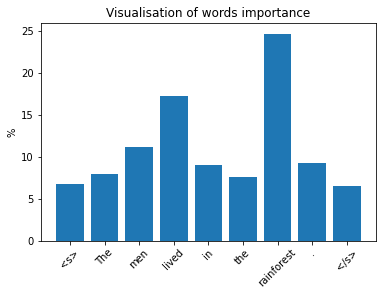

In [52]:
idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])

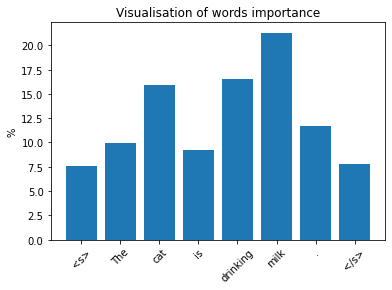

In [53]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

Vocab size : 500000


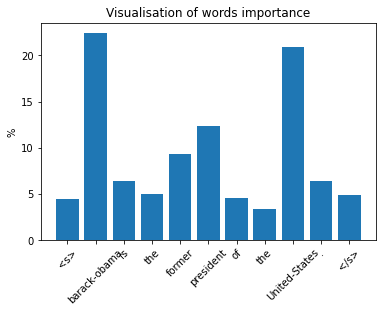

In [54]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = model.visualize(my_sent)

### Load Bert Model For Pedestrian

In [53]:
from bertopic import BERTopic

In [54]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [55]:
ped_auto_model = BERTopic(nr_topics="auto")
ped_auto_model = BERTopic.load("ped_auto_model")

In [56]:
ped_similar_topics, ped_similarity = ped_auto_model.find_topics("pedestrian", top_n=50)
print(ped_similar_topics)

[196, 412, 172, 363, 198, 114, 419, 294, 388, 314, 98, 80, 134, 432, 394, 53, 56, 150, 278, -1, 43, 265, 345, 378, 11, 331, 202, 169, 327, 309, 68, 216, 40, 99, 426, 344, 47, 8, 416, 112, 137, 441, 192, 20, 296, 144, 12, 224, 250, 376]


In [57]:
ped_related_words = []
ped_related_words_by_topic = dict()
for t in ped_similar_topics:
#     print(t)
    l1 = ped_auto_model.get_topic(t)
#     print(l1)
    el_list = []
    for el in l1:
        w = lemmatizer.lemmatize(el[0], get_wordnet_pos(el[0]))
        el_list.append(w)
        ped_related_words.append(w)
#     for e in el_list:
#         print(e)
    ped_related_words_by_topic[t]= set(el_list)
#     print('\n')

In [58]:
ped_related_words_by_topic

{196: {'cross',
  'crossing',
  'crosswalk',
  'pedestrian',
  'signal',
  'stripe',
  'traffic'},
 412: {'arrest',
  'pedestrian',
  'perp',
  'pers',
  'walk',
  'walkability',
  'walkable'},
 172: {'car',
  'lane',
  'pedestrian',
  'road',
  'street',
  'traffic',
  'transportation',
  'vehicle'},
 363: {'assault',
  'bystander',
  'intervene',
  'intervention',
  'stalk',
  'stalker',
  'victim',
  'witness'},
 198: {'car', 'garage', 'park', 'parking', 'parkjockey', 'tow', 'vehicle'},
 114: {'athlete',
  'disability',
  'paralympic',
  'paralympics',
  'sport',
  'sportspeople',
  'wheelchair'},
 419: {'avenue',
  'boulevard',
  'intersection',
  'manhattan',
  'road',
  'street',
  'suffix'},
 294: {'drive',
  'fine',
  'licence',
  'offence',
  'penalty',
  'reckless',
  'speed',
  'ticket',
  'traffic',
  'violation'},
 388: {'brownian',
  'diffusion',
  'distribution',
  'markov',
  'percolation',
  'step',
  'stochastic',
  'walk',
  'wiener'},
 314: {'circle',
  'interchange

In [61]:
def encoded_cosine(u, v):
    u_ = model.encode([u])[0]
    v_ = model.encode([v])[0]
    return np.dot(u_, v_) / (np.linalg.norm(u_) * np.linalg.norm(v_))

In [63]:
l1 = 'pedestrian stripe traffic crossing crosswalk cross signal'
encoded_cosine(l1, 'person on wheelchair in street.')

0.4348992

In [65]:
df1 = df.head(10)
df1

,language,page_url,image_url,page_title,section_title,hierarchical_section_title,caption_reference_description,caption_attribution_description,caption_alt_text_description,mime_type,original_height,original_width,is_main_image,attribution_passes_lang_id,page_changed_recently,context_page_description,context_section_description,caption,context
5,en,"https://en.wikipedia.org/wiki/Chinatown,_Sydney",http://upload.wikimedia.org/wikipedia/commons/...,"Chinatown, Sydney",Bilingual street signs,"Chinatown, Sydney / Bilingual street signs",NaN,English: Hay Street 中文（繁體）‎: 禧街,NaN,image/jpeg,960,1280,False,False,True,Chinatown is an urban enclave situated in the ...,There are many bilingual street signs across C...,English: Hay Street 中文（繁體）‎: 禧街,Chinatown is an urban enclave situated in the ...
6,en,https://en.wikipedia.org/wiki/Jayson_Musson,https://upload.wikimedia.org/wikipedia/commons...,Jayson Musson,NaN,Jayson Musson,"Jayson Musson on October 29, 2007","English: Jayson Scott Musson on October 29, 2007",NaN,image/jpeg,400,300,False,True,False,Jayson Scott Musson is an artist who lives and...,Jayson Scott Musson is an artist who lives and...,"Jayson Musson on October 29, 2007 English: Jay...",Jayson Scott Musson is an artist who lives and...
8,en,https://en.wikipedia.org/wiki/Euodynerus_megaera,https://upload.wikimedia.org/wikipedia/commons...,Euodynerus megaera,NaN,Euodynerus megaera,NaN,English: Euodynerus megaera,NaN,image/jpeg,433,531,True,True,False,Euodynerus megaera is a species of stinging wa...,Euodynerus megaera is a species of stinging wa...,English: Euodynerus megaera,Euodynerus megaera is a species of stinging wa...
9,en,https://en.wikipedia.org/wiki/Simon_W._Rosendale,https://upload.wikimedia.org/wikipedia/commons...,Simon W. Rosendale,NaN,Simon W. Rosendale,NaN,"English: Simon Wolfe Rosendale (June 23, 1842 ...",NaN,image/jpeg,727,404,True,True,False,Simon Wolfe Rosendale was an American lawyer a...,"Simon Wolfe Rosendale (June 23, 1842 – April 2...","English: Simon Wolfe Rosendale (June 23, 1842...",Simon Wolfe Rosendale was an American lawyer a...
11,en,https://en.wikipedia.org/wiki/List_of_National...,https://upload.wikimedia.org/wikipedia/commons...,List of National Natural Landmarks in Florida,National Natural Landmarks,List of National Natural Landmarks in Florida ...,NaN,English: Photograph of Rainbow Springs in Mari...,NaN,image/jpeg,1536,2048,False,True,False,The National Natural Landmarks in Florida incl...,NaN,English: Photograph of Rainbow Springs in Mar...,The National Natural Landmarks in Florida incl...
12,en,https://en.wikipedia.org/wiki/1998_Atlantic_hu...,https://upload.wikimedia.org/wikipedia/commons...,1998 Atlantic hurricane season,Hurricane Georges,1998 Atlantic hurricane season / Systems / Hur...,NaN,English: Hurricane Georges near peak intensity...,NaN,image/png,1892,1892,True,True,True,The 1998 Atlantic hurricane season was one of ...,Tropical Depression Seven developed from a tro...,English: Hurricane Georges near peak intensit...,The 1998 Atlantic hurricane season was one of ...
19,en,https://en.wikipedia.org/wiki/Alsodes_pehuenche,https://upload.wikimedia.org/wikipedia/commons...,Alsodes pehuenche,NaN,Alsodes pehuenche,NaN,Ejemplar hembra de Alsodes pehuenche,NaN,image/jpeg,376,500,True,False,True,Alsodes pehuenche is a species of frog in the ...,Alsodes pehuenche (common name: Pehuenche spin...,Ejemplar hembra de Alsodes pehuenche,Alsodes pehuenche is a species of frog in the ...
21,en,https://en.wikipedia.org/wiki/Pantile,http://upload.wikimedia.org/wikipedia/commons/...,Pantile,NaN,Pantile,"20–22 Marlborough Place, Brighton is roofed wi...","20–22 Marlborough Place, Brighton, City of Bri...",NaN,image/jpeg,1800,1800,False,True,False,"A pantile is a type of fired roof tile, normal...","A pantile is a type of fired roof tile, normal...","20–22 Marlborough Place, Brighton is roofed wi...","A pantile is a type of fired roof tile, normal..."
36,en,https://en.wikipedia.org/wiki/Martin_B-57_Ca

In [66]:
! date

Fri Apr 15 01:24:03 CDT 2022


In [71]:
df1['caption'].progress_apply(encoded_cosine, v=l1)

  0%|          | 0/10 [00:00<?, ?it/s]

5     0.251481
6     0.279144
8    -0.011409
9     0.324725
11    0.286022
12    0.410912
19    0.136491
21    0.334695
36    0.387634
40    0.307241
Name: caption, dtype: float32

In [68]:
! date

Fri Apr 15 01:24:04 CDT 2022


In [69]:
tqdm.pandas()

In [73]:
! date

Fri Apr 15 01:27:20 CDT 2022


In [74]:
df['caption'].progress_apply(encoded_cosine, v=l1)

  0%|          | 0/54071 [00:00<?, ?it/s]

5         0.251481
6         0.279144
8        -0.011409
9         0.324725
11        0.286022
            ...   
370348    0.385723
370356    0.320888
370357    0.406290
370358    0.362152
370368    0.356528
Name: caption, Length: 54071, dtype: float32

In [75]:
! date

Fri Apr 15 01:56:38 CDT 2022


In [60]:
for top in ped_related_words_by_topic:
    l1 = ' '.join(ped_related_words_by_topic[top])
#     df[f'csim_{top}'] = df['caption'].apply(nospecial)

    print(top, l1)

196 pedestrian stripe traffic crossing crosswalk cross signal
412 pedestrian arrest pers walk walkability perp walkable
172 pedestrian lane traffic street transportation road car vehicle
363 victim stalker witness intervention intervene bystander stalk assault
198 park car vehicle parkjockey parking tow garage
114 sport sportspeople paralympic paralympics athlete wheelchair disability
419 street road boulevard avenue intersection manhattan suffix
294 violation reckless traffic fine ticket licence penalty offence drive speed
388 stochastic brownian step markov diffusion walk wiener percolation distribution
314 lane junction traffic roundabout circle interchange road intersection
98 lane direction traffic road signage cross marker parking sign
80 collision brake accident nhtsa vehicle velocity drive momentum fatality
134 toronto highway lane freeway gardiner road expressway avenue ontario edmonton
432 novel poem walker book poetry pulitzer fiction alice
394 bridleway footpath path bridle

# Retrive Images

In [12]:
import urllib

In [13]:
def get_links(df, num):
    return df.image_url[:num].values

links = get_links(df, 10)


def load_images(links):
    images = []
    
    for link in links:
        URL = link
        try:

            with urllib.request.urlopen(URL) as url:
                with open('./temp.jpg', 'wb') as f:
                    f.write(url.read())

            img = PIL.Image.open('./temp.jpg')
            img = np.asarray(img)
            images.append(img)
        except:
            continue
    return images

def display_images(images, title=None): 
    f, ax = plt.subplots(2,5, figsize=(18,12))
    if title:
        f.suptitle(title, fontsize = 30)

    for i, image_id in enumerate(images):
        ax[i//5, i%5].imshow(image_id) 
   
        ax[i//5, i%5].axis('off')

    plt.show() 

In [14]:
links

array(['http://upload.wikimedia.org/wikipedia/commons/4/4f/Hay_Street.jpg',
       'https://upload.wikimedia.org/wikipedia/commons/2/2a/Jayson_Scott_Musson.jpg',
       'https://upload.wikimedia.org/wikipedia/commons/7/76/Euodynerus_megaera.jpg',
       'https://upload.wikimedia.org/wikipedia/commons/a/a5/Simon_W._Rosendale_001.jpg',
       'https://upload.wikimedia.org/wikipedia/commons/6/68/Rainbow_spgs_florida.JPG',
       'https://upload.wikimedia.org/wikipedia/commons/e/e9/Georges_September_19_1998_1745Z.png',
       'https://upload.wikimedia.org/wikipedia/commons/e/e0/Alsodes_pehuenche_hembra.jpg',
       'http://upload.wikimedia.org/wikipedia/commons/6/60/20%E2%80%9322_Marlborough_Place%2C_Brighton_%28NHLE_Code_1381771%29.JPG',
       'https://upload.wikimedia.org/wikipedia/commons/2/29/B-57_dropping_bombs.jpg',
       'https://upload.wikimedia.org/wikipedia/commons/9/9e/%22DUMONT%22_%22First_with_the_Finest_in_Television%22_art_detail%2C_1951_-_Chas_L_Bell_Company_-_Matchbook_-

In [15]:
images = load_images(links)

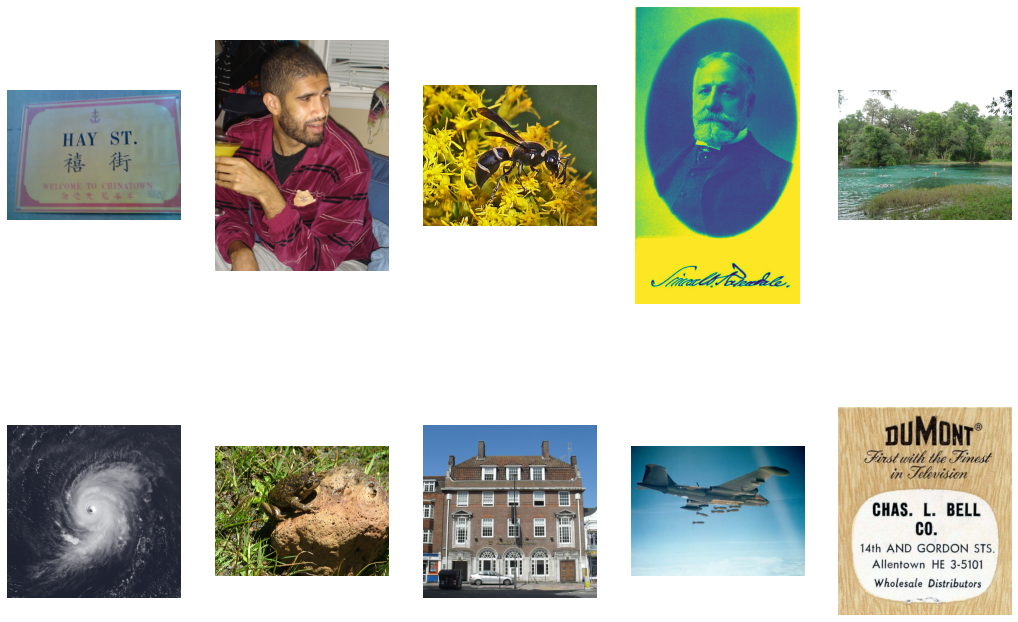

In [16]:
display_images(images)

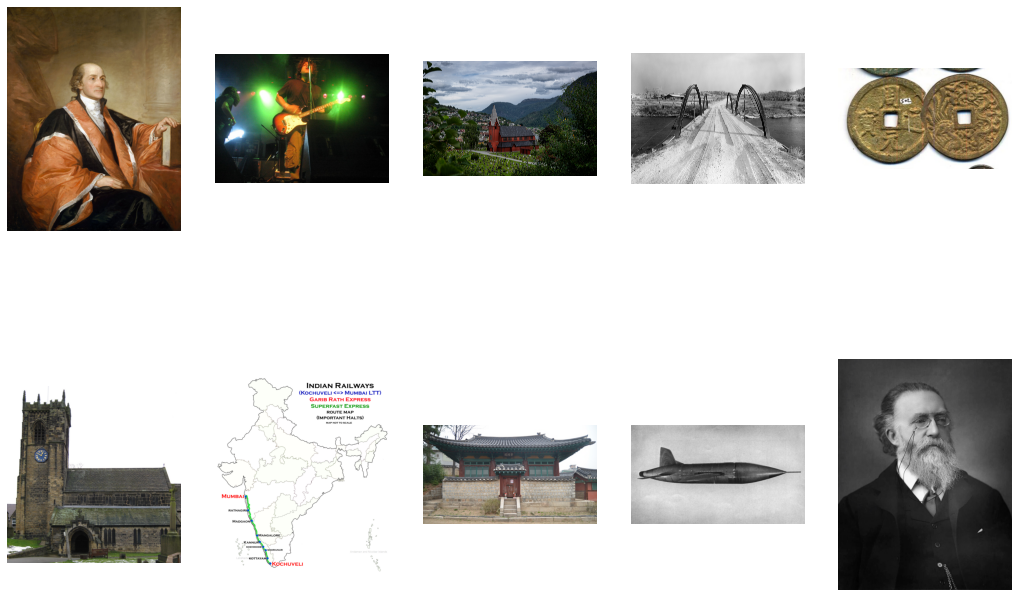

In [17]:
links = df.image_url[20:30].values
images = load_images(links)
display_images(images)

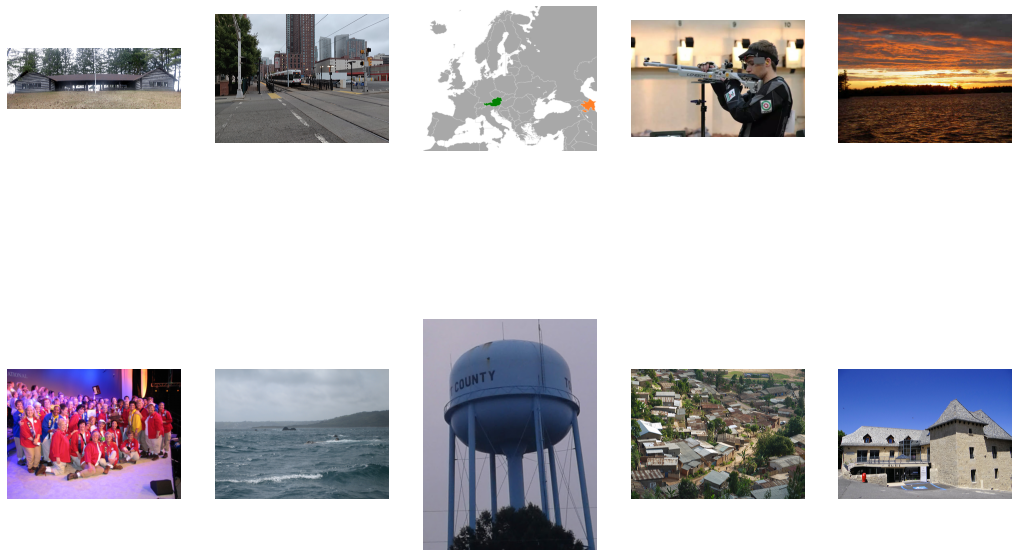

In [18]:
links = df.image_url[30:40].values
images = load_images(links)
display_images(images)

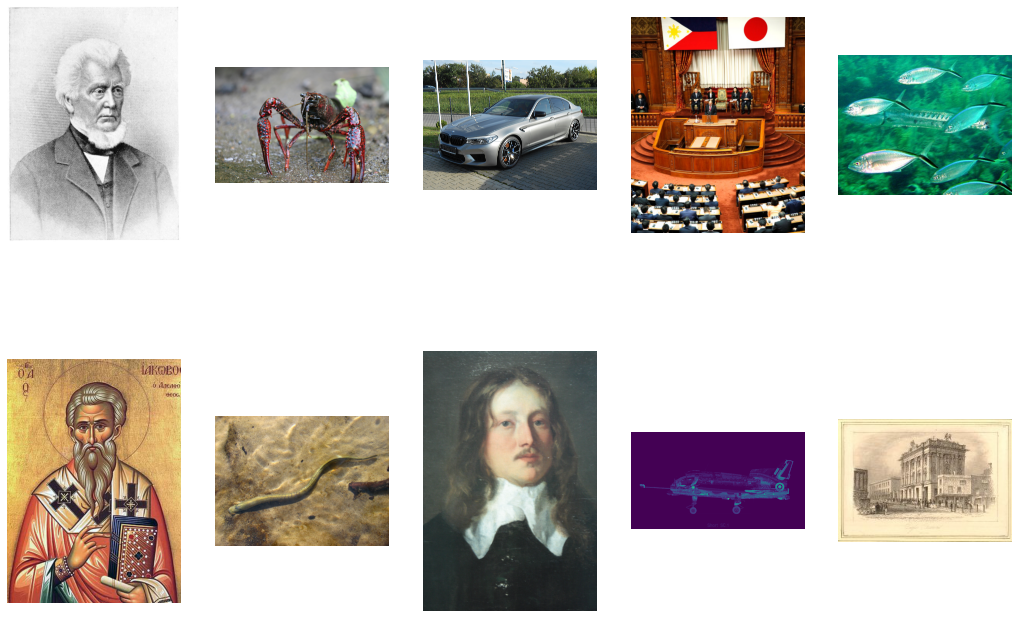

In [19]:
links = df.image_url[50:60].values
images = load_images(links)
display_images(images)